### Load Dataset

In [31]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

In [32]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

### EDA

In [33]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)

In [34]:
print(X.shape)
pd.DataFrame(X)

(70000, 784)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
print(y.shape)
pd.DataFrame(y)

(70000,)


,0
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


(-0.5, 27.5, 27.5, -0.5)

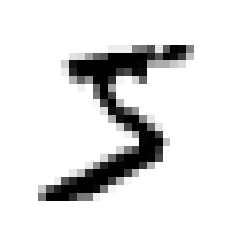

In [36]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")

### Split
Training set is already shuffled

In [37]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [38]:
# 5 binary classifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [39]:
y_train_5

array([ True, False, False, ...,  True, False, False])

### Train SGDClassifier

In [41]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

array([ True])

In [ ]:
sgd_clf.predict([some_digit])

### Use cross_val_score (Just on 5 classification)

In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [46]:
from sklearn.base import BaseEstimator

# Predict 0 for every instance
# In our case, we want to see the proportion
# of labels that aren't 5
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [47]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

### Confusion Matrix

In [48]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix_results = pd.DataFrame(confusion_matrix(y_train_5, y_train_pred))

# Rows are observations
# Columns are predictions
confusion_matrix_results

,0,1
0,53892,687
1,1891,3530


In [65]:
# Precision Metric
TP = confusion_matrix_results.iloc[1,1]
FP = confusion_matrix_results.iloc[0,1]
precision = TP / (TP+FP)
print(precision)

0.8370879772350012


In [66]:
# Recall Metric
FN = confusion_matrix_results.iloc[1,0]
recall = TP / (TP+FN)
print(recall)

0.6511713705958311


In [67]:
2 * ((precision * recall) / (precision + recall))

0.7325171197343846

In [68]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [75]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
recall = recall_score(y_train_5, y_train_pred)
precision = precision_score(y_train_5, y_train_pred)

In [86]:
np.where(recalls == recall)
np.where(precisions == precision)

recall_index = np.where(recalls == recall)
precision_index = np.where(precisions == precision)

print(thresholds[precision_index])
print(thresholds[recall_index])

[4.69238973]
[4.69238973]


In [139]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(10,5))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    
    recall_index = np.where(recalls == recall)
    precision_index = np.where(precisions == precision)

    plt.plot(thresholds[recall_index], recalls[recall_index], 'o', color='red',
             markersize=12)
    plt.plot(thresholds[precision_index], precisions[precision_index],'o', color='red',
             markersize=12)
    
    plt.plot([thresholds[0], thresholds[precision_index]], 
             [precisions[precision_index], precisions[precision_index]],
             'r:')
    
    plt.plot([thresholds[0], thresholds[precision_index]], 
             [recalls[recall_index], recalls[recall_index]],
             'r:')
    
    plt.plot([thresholds[precision_index], thresholds[precision_index]], 
             [precisions[precision_index], 0],
             'r:')
    
    plt.margins(0,0)
    plt.grid(color='lightgrey', linestyle='-', linewidth=1)
    plt.xlabel('Thresholds')
    plt.ylabel('Score')
    plt.legend()

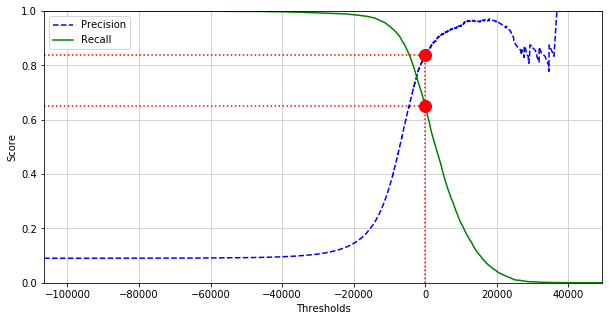

In [140]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

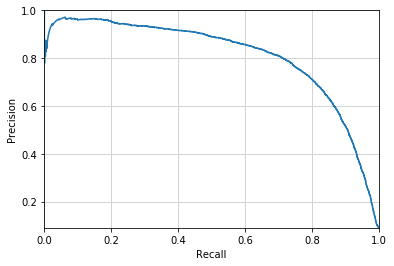

In [150]:
plt.margins(0,0)
plt.grid(color='lightgrey', linestyle='-', linewidth=1)
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision');

In [152]:
# Assume 90% precision desired
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439557

In [154]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
print(precision_score(y_train_5, y_train_pred_90))
print(recall_score(y_train_5, y_train_pred_90))

0.9000345901072293
0.4799852425751706


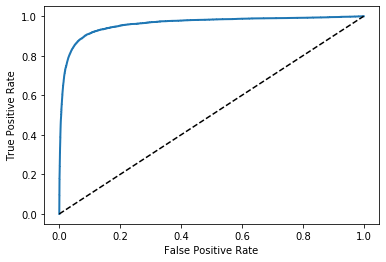

In [157]:
# ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr);

In [158]:
# AUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

### Random Forest Classifier

In [171]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

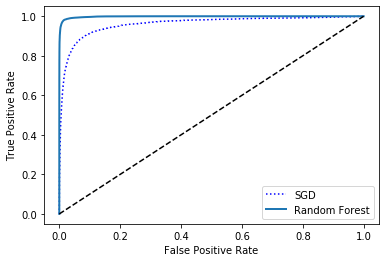

In [170]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right");

In [163]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [166]:
y_forest_pred = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [167]:
recall_score(y_train_5, y_forest_pred)

0.8662608374838591

In [168]:
precision_score(y_train_5, y_forest_pred)

0.9905083315756169

### Multiclass Classfication

In [183]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

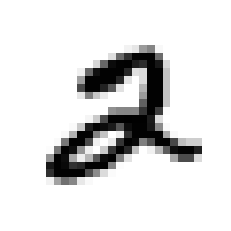

In [197]:
some_digit = X[5]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
some_digit_scores = sgd_clf.decision_function([some_digit])

In [210]:
sgd_clf.predict([some_digit])

array([2], dtype=uint8)

In [219]:
results = pd.DataFrame(some_digit_scores.T, columns=['Scores'])
results["Classes"] = sgd_clf.classes_

In [220]:
results

,Scores,Classes
0,-15541.828887,0
1,-29286.652712,1
2,3512.169813,2
3,-6832.083908,3
4,-19312.772233,4
5,-9222.093111,5
6,-33451.066159,6
7,-21325.873689,7
8,-2296.787959,8
9,-6958.233322,9


In [223]:
# One Vs One Classifier
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=1000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [224]:
ovo_clf.predict([some_digit])

array([2], dtype=uint8)

In [225]:
len(ovo_clf.estimators_)

45

In [226]:
# Try Regression
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([2], dtype=uint8)

In [229]:
results = pd.DataFrame(forest_clf.predict_proba([some_digit]).T, columns=['Scores'])
results["Classes"] = forest_clf.classes_

In [230]:
results

,Scores,Classes
0,0.01,0
1,0.00,1
2,0.88,2
3,0.01,3
4,0.00,4
5,0.04,5
6,0.01,6
7,0.00,7
8,0.03,8
9,0.02,9


In [231]:
# Cross validation on SGDClassifier for Multiclass Classification
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [242]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [244]:
X_train_scaled = num_pipeline.fit_transform(X_train)

In [247]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

<Figure size 1440x720 with 0 Axes>

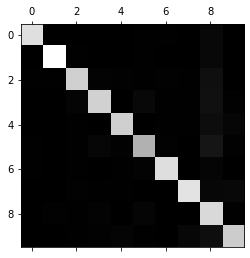

In [251]:
conf_mx = confusion_matrix(y_train, y_train_pred)

plt.matshow(conf_mx, cmap=plt.cm.gray)

In [252]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

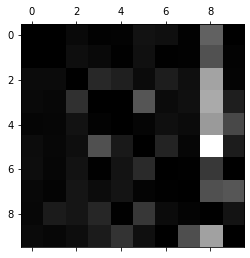

In [253]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)